In [1]:
# from astropy.io import fits
# from astropy.table import Table
# import numpy as np
# import matplotlib.pylab as plt
# import matplotlib.lines as mlines
# from matplotlib.legend import Legend
# from pythonds.basic.stack import Stack
# from math import *
# from sklearn.neighbors import KDTree
# from lrg_plot_functions import *
# from lrg_sum_functions import *
# from cosmo_Calc import *
# from divideByTwo import *
# from read_data import *
# from nearNeighbors import *
# from localBKG import *
# from scipy import stats
# from bestBkg import *
# from astropy import stats
# import healpy as hp

from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [3]:
# Reads in data files for use in readData.py

# hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                  # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('//Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

id_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)

print("end readdata")


done reading in SDSS
['0' '0' '0' ... '0' '0' '0']
done finding LRG flags
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
643560
done making survey cuts
done reading in SDSS
['0' '0' '0' ... '0' '0' '0']
done finding LRG flags
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
253596
done making survey cuts
end readdata


In [4]:
ra = np.concatenate([ra_LRG1, ra_BKG1, ra_BKG2])
dec = np.concatenate([dec_LRG1, dec_BKG1, dec_BKG2])
z_LRG = z_LRG1

gmag_LRG = 22.5 - 2.5 * np.log10(gflux_LRG1)
# gmag_LRG2 = 22.5 - 2.5 * np.log10(gflux_LRG2)
rmag_LRG = 22.5 - 2.5 * np.log10(rflux_LRG1)
# rmag_LRG2 = 22.5 - 2.5 * np.log10(rflux_LRG2)
zmag_LRG = 22.5 - 2.5 * np.log10(zflux_LRG1)
# zmag_LRG2 = 22.5 - 2.5 * np.log10(zflux_LRG2)


# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag = np.concatenate([gmag_LRG, gmag_BKG1, gmag_BKG2])
rmag = np.concatenate([rmag_LRG, rmag_BKG1, rmag_BKG2])
zmag = np.concatenate([zmag_LRG, zmag_BKG1, zmag_BKG2])


length phi:  899257
pixnums:  [8103224 8103204 8103207 ... 8099745 8099745 8099581]
8103224
length pixnums:  899257


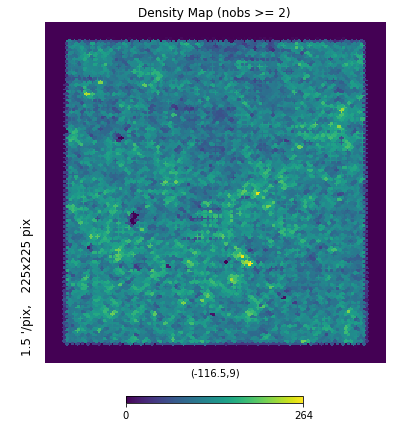

In [5]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# ra_cut = ra[np.where(zmag <= 21.5)]
# dec_cut = dec[np.where(zmag <= 21.5)]

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))
# Convert angles theta and phi to pixel numbers
pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print('pixnums: ', pixnums)
print(pixnums[0])
print('length pixnums: ', len(pixnums))


# Create a HEALPix map from pix
mapp = np.bincount(pixnums, minlength=npixel)
# print('map where ne 0: ', mapp[np.where(mapp > 0)])
# print('length map == 0: ', len(mapp[np.where(mapp == 0)]))
# print('length map: ', len(mapp))

# masked_map = np.zeros(len(mapp))
# masked_map[(mapp == 0)] = 1

# m = hp.ma(mapp)
# m.mask = masked_map

# Plot mapp
hp.gnomview(mapp, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (nobs >= 2)')
plt.show()



[22.12882805 23.55171204 22.46174812 ... 22.44408989 20.46632195
 21.70546532]


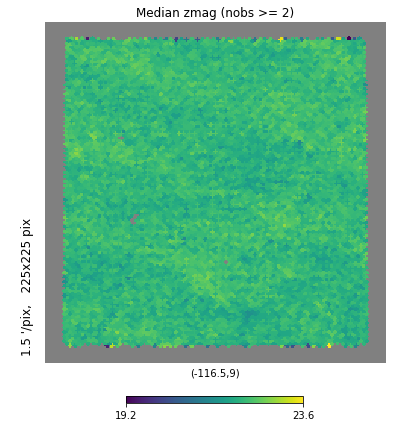

In [6]:
# This section maps various values of the galaxies into a HEALPix map so the result is basically a density map of
# galaxy properties. In this code the new maps are array_g, array_r, and array_z.

# returns indices that would sort the array pixnums
pixorder = np.argsort(pixnums)
# returns sorted unique values of pixnums, indices to reconstruct the original array from the unique array,
# and the number of times each unique value comes up in the original array
pixels, pixinverse, pixcnts = np.unique(pixnums, return_inverse=True, return_counts=True)

# print(len(pixnums))
# print('----')
# print(pixorder)
# print('----')
# print(len(pixels))
# print('----')
# print(pixcnts)
# inserts a zero in the zeroth index space, moving all other values down the line
pixcnts = np.insert(pixcnts, 0, 0)
# calculates the cumulative sum of the values in pixcnts
pixcnts = np.cumsum(pixcnts)
# print(pixcnts)

# This seems like a weird thing to do, but this is why: pixnums is an array of pixel numbers that correspond to a
# galaxy. There are many galaxies per pixel, so the individual pixnum will repeat. pixcnts is the number of times
# each unique value appears in pixnums. pixorder is the array of indices that would sort pixnums. The loop below makes
# a map of median values per pixel for any desired characteristic. In the loop, inds is the index array of galaxies
# that show up in a pixel (the pixnum values). It uses the range set by pixcnts to determine which index from
# pixorder is used. In the loop, pix is the pixel number inds belongs in.

array_g = np.full(npixel, -1.)
array_r = np.full(npixel, -1.)
array_z = np.full(npixel, -1.)
pix = []
for i in range(len(pixcnts)-1):
# for i in range(1):
    inds = pixorder[pixcnts[i]:pixcnts[i+1]]
#     print(inds)
    pix = pixnums[inds][0]
#     print(pix)
    array_z[pix] = np.median(zmag[inds])
    # array_g[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_g[inds]))) - 9.)
    # array_r[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_r[inds]))) - 9.)
    # array_z[pix] = -2.5*(np.log10(5. / np.sqrt(np.median(galdepth_z[inds]))) - 9.)

print(array_z[array_z != -1])
# # masked_map_g = np.zeros(len(array_g))
# # masked_map_g[(array_g == -1.)] = 1
# #
# # mg = hp.ma(array_g)
# # mg.mask = masked_map_g
# #
# # masked_map_r = np.zeros(len(array_r))
# # masked_map_r[(array_r == -1.)] = 1
# #
# # mr = hp.ma(array_r)
# # mr.mask = masked_map_r

masked_map_z = np.zeros(len(array_z))
masked_map_z[(array_z == -1.)] = 1

mz = hp.ma(array_z)
mz.mask = masked_map_z

# # hp.gnomview(mg, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median gmag (nobs >= 2)')
# # plt.show()
# #
# # hp.gnomview(mr, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median rmag (nobs >= 2)')
# # plt.show()

# This HEALPix image shows the median zmag in each pixel

hp.gnomview(mz, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Median zmag (nobs >= 2)')
plt.show()


sorted array;  [19.23517609 19.56455994 19.65250015 ... 23.24108696 23.41030121
 23.55171204]
nz1 =  772.0
percentile:  21.54065336608887
my way:  772.5
<class 'numpy.float64'>
22.358400344848633


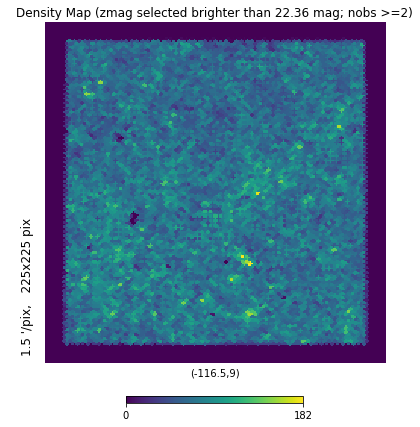

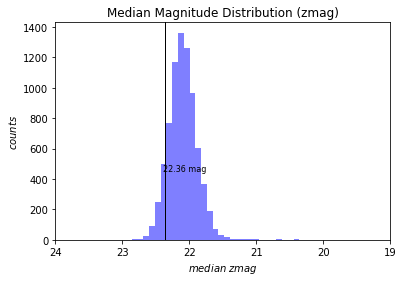

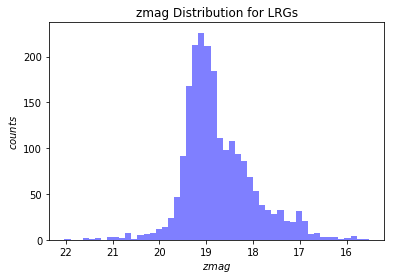

In [8]:
# This section isolates the top 95 percent brightest sources in zmag. array_z is a map of median values for zmag for
# each HEALPix pixel.


# sorted_array_g = np.sort(array_g[np.where(array_g != -1.)])
# reverse_sorted_g = sorted_array_g[::-1]
# cutlen_g = len(reverse_sorted_g) * 0.98
# ng = np.rint(cutlen_g)
#
# sorted_array_r = np.sort(array_r[np.where(array_r != -1.)])
# reverse_sorted_r = sorted_array_r[::-1]
# cutlen_r = len(reverse_sorted_r) * 0.98
# nr = np.rint(cutlen_r)
#

# sorts array_z for values that do not equal -1 (-1 is the value representing an empty pixel); goes from brightest to
# faintest 
sorted_array_z = np.sort(array_z[np.where(array_z != -1.)])
print('sorted array; ', sorted_array_z)
# because smaller magnitudes are brighter, reverse sort the array. I guess you don't have to do that but that's
# what I did. goes from faintest to brightest 
reverse_sorted_z = sorted_array_z[::-1]
# this multiplies the length of reverse_sorted_z by 0.98 to get the 2 percent brightest galaxies. cutlen_z is an
# index value and everything after this index value is in the 2 percent brightest galaxies. 
cutlen_z1 = len(reverse_sorted_z) * 0.10
# didn't realize the percentile function existed before now. This function comes up with a value that differs by
# 1.4 mag. Explanation of difference found here: https://stackoverflow.com/questions/33344860/what-does-numpys-percentile-function-do-exactly
# Since the percentile found with numpy doesn't have to be a number in the array, I think I want to use the cut found
# my way.
cutlen_z2 = np.percentile(reverse_sorted_z, 0.90)
nz1 = np.rint(cutlen_z1)
print('nz1 = ', nz1)
print('percentile: ', cutlen_z2)
# print(reverse_sorted_z)
print('my way: ', cutlen_z1)
print(type(nz1))
print(reverse_sorted_z[int(nz1)])

ra98 = ra[np.where(zmag <= reverse_sorted_z[np.int64(nz1)])]
dec98 = dec[np.where(zmag <= reverse_sorted_z[np.int64(nz1)])]

theta98 = []
phi98 = []

for i in range(len(ra98)):
    theta98.append(np.radians(90. - dec98[i]))
    phi98.append(np.radians(ra98[i]))

# Convert angles theta and phi to pixel numbers
pixnums98 = hp.ang2pix(nside, theta98, phi98, nest=True)

# Create a HEALPix map from pix
density_map98 = np.bincount(pixnums98, minlength=npixel)

# masked_density = np.zeros(len(density_map98))
# masked_density[(density_map98 == -1.)] = 1
# md = hp.ma(density_map98)
# md.mask = masked_density

# Plot mapp
hp.gnomview(density_map98, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (zmag selected brighter than 22.36 mag; nobs >=2)')
plt.savefig("/Users/mtownsend/Desktop/new_density.pdf")
plt.show()

plt.title("Median Magnitude Distribution (zmag)")
plt.hist(array_z[np.where(array_z != -1.)], bins=50, color='blue', alpha=0.5)
plt.xlabel(r'$median$ $zmag$')
plt.ylabel(r'$counts$')
plt.xlim(19., 24.)
plt.gca().invert_xaxis()
plt.axvline(x=reverse_sorted_z[np.int64(nz1)], linewidth=1, color='black')
plt.text(22.4, 450, '{} mag'.format(np.around(reverse_sorted_z[np.int64(nz1)], decimals=2)), fontsize=8)
# plt.savefig("/Users/mtownsend/Desktop/zmag_cut.pdf")
plt.show()

plt.title("zmag Distribution for LRGs")
plt.hist(zmag_LRG, bins=50, color='blue', alpha=0.5)
plt.xlabel(r'$zmag$')
plt.ylabel(r'$counts$')
# plt.xlim(19., 24.)
plt.gca().invert_xaxis()
# plt.axvline(x=reverse_sorted_z[np.int64(nz1)], linewidth=1, color='black')
# plt.text(22.4, 450, '{} mag'.format(np.around(reverse_sorted_z[np.int64(nz1)], decimals=2)), fontsize=8)
# plt.savefig("/Users/mtownsend/Desktop/zmag_cut.pdf")
plt.show()
